In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(1)

df1=pd.read_csv('exoTrain.csv')
print(df1)
df2=pd.read_csv('exoTest.csv')
print(df2)

Using TensorFlow backend.


      LABEL     FLUX.1     FLUX.2     FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0         2      93.85      83.81      20.10    -26.98    -39.56   -124.71   
1         2     -38.88     -33.83     -58.54    -40.09    -79.31    -72.81   
2         2     532.64     535.92     513.73    496.92    456.45    466.00   
3         2     326.52     347.39     302.35    298.13    317.74    312.70   
4         2   -1107.21   -1112.59   -1118.95  -1095.10  -1057.55  -1034.48   
5         2     211.10     163.57     179.16    187.82    188.46    168.13   
6         2       9.34      49.96      33.30      9.63     37.64     20.85   
7         2     238.77     262.16     277.80    190.16    180.98    123.27   
8         2    -103.54    -118.97    -108.93    -72.25    -61.46    -50.16   
9         2    -265.91    -318.59    -335.66   -450.47   -453.09   -561.47   
10        2     118.81     110.97      79.53    114.25     48.78      3.12   
11        2    -239.88    -164.28    -180.91   -225.69    -90.66

     LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
5        1    14.28    10.63    14.56    12.42    12.07    12.92    12.27   
6        1  -150.48  -141.72  -157.60  -184.60  -164.89  -173.87  -162.91   
7        1   -10.06   -12.78   -13.16    -9.81   -18.91   -20.33   -22.85   
8        1   454.66   440.60   382.29   361.63   298.63   253.29   155.86   
9        1   187.40   209.60   199.91   179.62   171.21   161.84   163.02   
10       1   205.07   177.98   163.41   159.70   157.71   167.57   191.28   
11       1   335.74   330.21   290.66   274.18   271.24   176.42   176.75   

In the traning data, We have light intensites of stars measured at 3198 time instances. 
The training data has the flux sequenc for 5087 stars while the test data has the flux sequences for 570 stars. 
If the value in LABEL column is 2, it is an exoplanet host star and if it is 1, it is not an exoplanet host star

Shape of Xtrain: (5087, 3197) 
Shape of ytrain: (5087,)


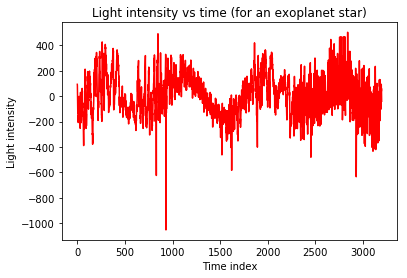

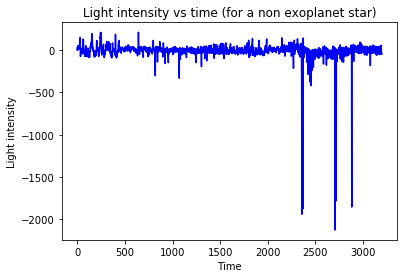

In [2]:
train_data=np.array(df1,dtype=np.float32)
#print(train_data)
test_data=np.array(df2,dtype=np.float32)
#print(test_data)

ytrain=train_data[:,0]
Xtrain=train_data[:,1:]

ytest=test_data[:,0]
Xtest=test_data[:,1:]

# print(ytrain,'\n',Xtrain)
# print(ytest,'\n',Xtest)

m=0   # A chosen exoplanet host star's index
n=100 # A chosen non-exoplanet host star's index

print('Shape of Xtrain:',np.shape(Xtrain),'\nShape of ytrain:',np.shape(ytrain))


plt.plot(Xtrain[m],'r')
plt.title('Light intensity vs time (for an exoplanet star)')
plt.xlabel('Time index')
plt.ylabel('Light intensity')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('Light intensity vs time (for a non exoplanet star)')
plt.xlabel('Time')
plt.ylabel('Light intensity')
plt.show()

## Applying Fourier Transform

Shape of Xtrain: (5087, 1599) 
Shape of ytrain: (5087,)


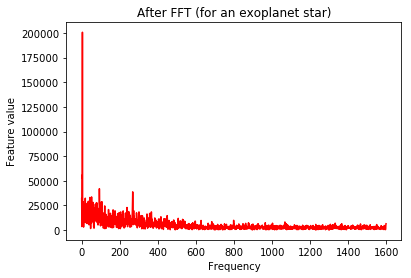

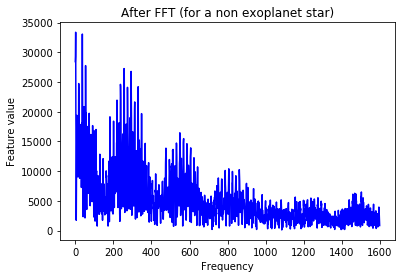

In [3]:
from scipy.fftpack import fft

Xtrain=np.abs(fft(Xtrain,n=len(Xtrain[0]),axis=1))
Xtest=np.abs(fft(Xtest,n=len(Xtest[0]),axis=1))

# print(Xtrain,Xtrain.shape)

Xtrain=Xtrain[:,:1+int((len(Xtrain[0])-1)/2)]
# print('\n\n',Xtrain,Xtrain.shape)
print('Shape of Xtrain:',np.shape(Xtrain),'\nShape of ytrain:',np.shape(ytrain))

Xtest=Xtest[:,:1+int((len(Xtest[0])-1)/2)]

plt.plot(Xtrain[m],'r')
plt.title('After FFT (for an exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('After FFT (for a non exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

## Normalizing

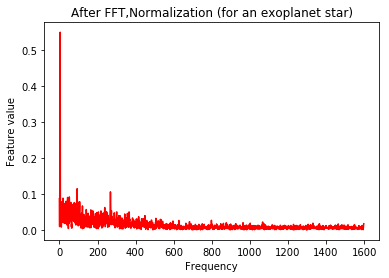

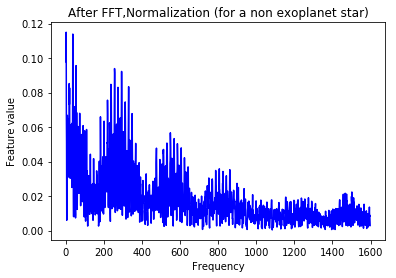

In [4]:
from sklearn.preprocessing import normalize

Xtrain=normalize(Xtrain)
Xtest=normalize(Xtest)

plt.plot(Xtrain[m],'r')
plt.title('After FFT,Normalization (for an exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('After FFT,Normalization (for a non exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

## Applying Gaussian Filter

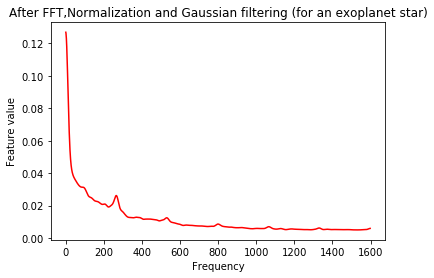

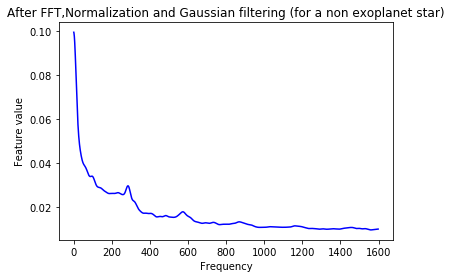

In [5]:
from scipy import ndimage

Xtrain=ndimage.filters.gaussian_filter(Xtrain,sigma=10)
Xtest=ndimage.filters.gaussian_filter(Xtest,sigma=10)

plt.plot(Xtrain[m],'r')
plt.title('After FFT,Normalization and Gaussian filtering (for an exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('After FFT,Normalization and Gaussian filtering (for a non exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

## Scaling down the data 

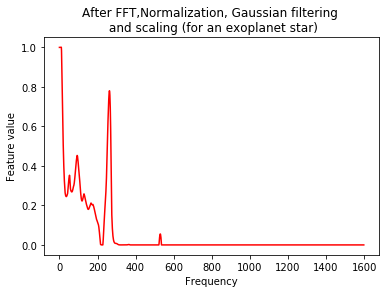

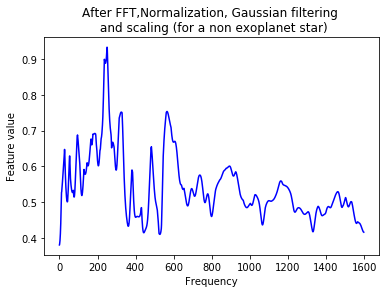

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

plt.plot(Xtrain[m],'r')
plt.title('After FFT,Normalization, Gaussian filtering \n and scaling (for an exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('After FFT,Normalization, Gaussian filtering \n and scaling (for a non exoplanet star)')
plt.xlabel('Frequency')
plt.ylabel('Feature value')
plt.show()

### By looking at the last 2 curves, we can say that fourier transform has helped us in seeing that, for an exoplanet star, the curve has a sudden dip. And, for the non-exoplanet star, the curve is almost on the same level with high fluctuations.

## LSTM RNN Model and Training

In [7]:
# reshaping to give as input to the RNN:
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],1,Xtrain.shape[1]))
Xtest = np.reshape(Xtest,(Xtest.shape[0],1,Xtest.shape[1]))
print('Shape of Xtrain:',np.shape(Xtrain),'\nShape of ytrain:',np.shape(ytrain))

# LSTM RNN Model:
def LSTM_RNN():
    model = Sequential()
    model.add(LSTM(32,input_shape=(1,Xtrain.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
    return model

estimator=KerasClassifier(build_fn=LSTM_RNN,epochs=10,batch_size=64,verbose=1)

# Training:
history=estimator.fit(Xtrain,ytrain)

Shape of Xtrain: (5087, 1, 1599) 
Shape of ytrain: (5087,)
Epoch 1/10
5087/5087 [==============================] - 5s 922us/step - loss: 0.0478 - acc: 0.9847
Epoch 2/10
5087/5087 [==============================] - 3s 503us/step - loss: 0.0224 - acc: 0.9953
Epoch 3/10
5087/5087 [==============================] - 3s 494us/step - loss: 0.0132 - acc: 0.9972
Epoch 4/10
5087/5087 [==============================] - 3s 507us/step - loss: 0.0099 - acc: 0.9982
Epoch 5/10
5087/5087 [==============================] - 2s 458us/step - loss: 0.0067 - acc: 0.9988
Epoch 6/10
5087/5087 [==============================] - 2s 422us/step - loss: 0.0059 - acc: 0.9986
Epoch 7/10
5087/5087 [==============================] - 2s 437us/step - loss: 0.0044 - acc: 0.9992
Epoch 8/10
5087/5087 [==============================] - 3s 521us/step - loss: 0.0041 - acc: 0.9992
Epoch 9/10
5087/5087 [==============================] - 2s 454us/step - loss: 0.0037 - acc: 0.9994
Epoch 10/10
5087/5087 [===========================

## Training and Testing results

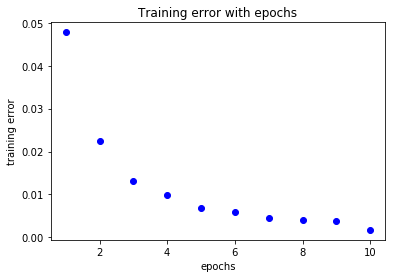

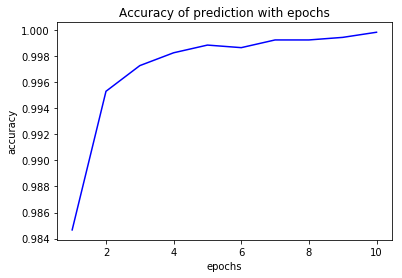

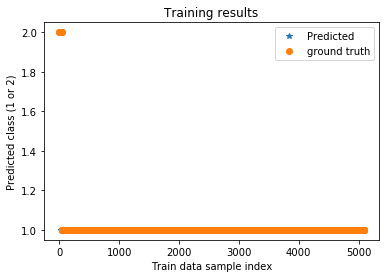

We can see that the model is well trained on training data as it is predicting correctly


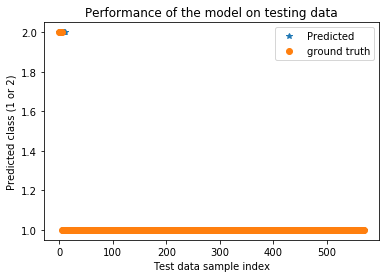

In [8]:
loss=history.history['loss']
acc=history.history['acc']

epochs=range(1,len(loss)+1)
plt.title('Training error with epochs')
plt.plot(epochs,loss,'bo',label='training loss')
plt.xlabel('epochs')
plt.ylabel('training error')
plt.show()

plt.plot(epochs,acc,'b',label='accuracy')
plt.title('Accuracy of prediction with epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# make predictions
trainPredict = estimator.predict(Xtrain,verbose=0)
testPredict = estimator.predict(Xtest,verbose=0)

plt.title('Training results')
plt.plot(trainPredict,'*',label='Predicted')
plt.plot(ytrain,'o',label='ground truth')
plt.xlabel('Train data sample index')
plt.ylabel('Predicted class (1 or 2)')
plt.legend()
plt.show()
print('We can see that the model is well trained on training data as it is predicting correctly')

plt.title('Performance of the model on testing data')
plt.plot(testPredict,'*',label='Predicted')
plt.plot(ytest,'o',label='ground truth')
plt.xlabel('Test data sample index')
plt.ylabel('Predicted class (1 or 2)')
plt.legend()
plt.show()


## Accuracy, Precision and recall of the model

In [9]:
from sklearn import metrics as sk_met
accuracy_train=sk_met.accuracy_score(ytrain,trainPredict)
accuracy_test= sk_met.accuracy_score(ytest,testPredict)
print('\t\t train data \t test data')
print('accuracy:  ',accuracy_train,'\t',accuracy_test)

precision_train=sk_met.precision_score(ytrain,trainPredict)
precision_test=sk_met.precision_score(ytest,testPredict)
print('precision: ',precision_train,'\t',precision_test)

recall_train=sk_met.recall_score(ytrain,trainPredict)
recall_test=sk_met.recall_score(ytest,testPredict)
print('recall:    ',recall_train,'\t\t',recall_test)


		 train data 	 test data
accuracy:   0.9990171024179281 	 0.9894736842105263
precision:  0.9990108803165183 	 1.0
recall:     1.0 		 0.9893805309734514
